
<img src="https://i.ibb.co/1T5Wbn6/Banner-para-Linkedin-capa-de-perfil-para-programador.png"  alt="KCode Banner"  />

<a href="https://www.linkedin.com/in/kauebr/"><img src="https://cdn-icons-png.flaticon.com/512/174/174857.png" width="30" ></a> <a href="mailto: kauemandarino@gmail.com"><img src="https://cdn-icons-png.flaticon.com/512/5968/5968534.png" width="30" ></a><a href="
https://api.whatsapp.com/send?phone=5541987947490&text=Oi"> <img src="https://imagepng.org/wp-content/uploads/2017/08/whatsapp-icone-1.png" width="30" ></a><a href="https://github.com/kauebr/"><img src="https://github.githubassets.com/images/modules/logos_page/Octocat.png" width="30" ></a>


# Estatística Bivariada
## Variável qualitativa x variável quantitativa

## Objetivo:

* Hoje farei uma análise de relação entre uma variável qualitativa e uma quantitativa;
* Escolhi criar um dataset aleatório com 333 amostras, com duas váriaveis, sendo elas, tamanho e altura.

### Metodologia/Passos

* Gerar um dataset fictício com os dados, o dataset terá uma amostra maior feminina do que a amostra masculina, e o tamanho dos homens será ligeiramente maior que o das mulheres;
* Plotar 4 gráficos adequados a esta análise, sendo eles: `histograma, densidade, boxplot e violino`;
* Escrever uma breve análise sobre o conjunto, que deve bater, logicamente, com o passo 1.

In [140]:
# Importantdo bibliotecas pertinentes
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew, kurtosis


### Gerando um conjunto de dados aleatório, mas com características semelhantes às encontradas na realidade:
O código abaixo tem como objetivo gerar um conjunto de dados fictício que contenha informações sobre o sexo e o tamanho de um grupo de pessoas. A amostra terá uma quantidade maior de mulheres do que de homens, e o tamanho dos homens será ligeiramente maior do que o das mulheres.
Para isso, utilizarei a biblioteca random do Python para gerar valores aleatórios de altura com médias e desvios-padrão diferentes para cada grupo (homens e mulheres).

In [141]:
n_fem = int(round((333 * 0.489), 0))
n_masc = int(round((333 * 0.511),0))

In [142]:
# Definindo a quantidade de homens e mulheres
# Com base em uma total de 333 pessoas utilizei a proporção real de homens x mulheres no Brasil, segundo o site do IBGE
n_fem = int(round((333 * 0.489), 0))
n_masc = int(round((333 * 0.511), 0))

# Definindo as médias e desvios-padrão de cada grupo;
# Utilizei as médias reais do homem e da mulher brasileira, encontrados em rápida pesquisa na internet. https://shre.ink/Q016
mu_fem = 1.62  # Média de altura das mulheres em metros
mu_masc = 1.75  # Média de altura dos homens em metros


sigma_fem = 0.1 # Desvio-padrão de altura das mulheres em metros
sigma_masc = 0.12  # Desvio-padrão de altura dos homens em metros

# Gerando os dados de altura para cada grupo
altura_fem = [random.normalvariate(mu_fem, sigma_fem) for _ in range(n_fem)]
altura_masc = [random.normalvariate(mu_masc, sigma_masc) for _ in range(n_masc)]

# Criando as listas de sexo para cada grupo
sexo_fem = ["F"] * n_fem
sexo_masc = ["M"] * n_masc


#### Agora vou combinar essas listas suprageradas em um único DataFrame utilizando a biblioteca pandas.

In [143]:
# Juntando todas as listas em um único DataFrame
dados = pd.DataFrame({"Sexo": sexo_fem + sexo_masc, "Tamanho": altura_fem + altura_masc})

# Arredondando para 2 casas decimais 
dados["Tamanho"] = round(dados["Tamanho"], 2)
# Imprimindo as primeiras linhas do DataFrame

# Exibindo conjunto de dados
dados


,Sexo,Tamanho
0,F,1.58
1,F,1.66
2,F,1.86
3,F,1.62
4,F,1.49
...,...,...
328,M,1.87
329,M,1.71
330,M,1.86
331,M,1.66


#### Uma vez definido o nosso modelo, vamos à etapa de criação dos gráficos:

Agora vou utilizar as bibliotecas `matplotlib` e `seaborn` para gerar quatro gráficos que ajudem na análise dos dados: `histograma, densidade, boxplot e violino`. Esses gráficos serão úteis para visualizar a distribuição dos tamanhos para cada grupo e verificar se existem diferenças significativas entre eles.

### Histograma:

Curtose masculina: 0.13, Curtose feminina: -0.27
Assimetria masculina: -0.02, Assimetria feminina: 0.07


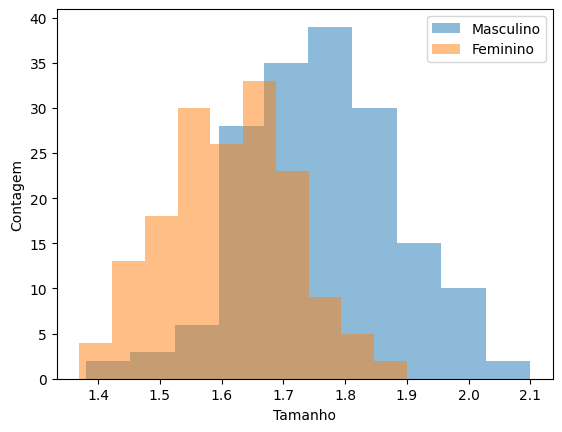

In [144]:
# Criando histograma para as duas variáveis
fig, ax = plt.subplots()
ax.hist(dados[dados['Sexo'] == 'M']['Tamanho'], alpha=0.5, label='Masculino')
ax.hist(dados[dados['Sexo'] == 'F']['Tamanho'], alpha=0.5, label='Feminino')
ax.set_xlabel('Tamanho')
ax.set_ylabel('Contagem')
ax.legend()

# Calculando a curtose e a assimetria
curtose_m = kurtosis(dados[dados['Sexo'] == 'M']['Tamanho'])
curtose_f = kurtosis(dados[dados['Sexo'] == 'F']['Tamanho'])
assimetria_m = skew(dados[dados['Sexo'] == 'M']['Tamanho'])
assimetria_f = skew(dados[dados['Sexo'] == 'F']['Tamanho'])
print(f'Curtose masculina: {curtose_m:.2f}, Curtose feminina: {curtose_f:.2f}')
print(f'Assimetria masculina: {assimetria_m:.2f}, Assimetria feminina: {assimetria_f:.2f}')

plt.show()

Utilizei a função 'kurtosis' para cálcular a curtose dos dados masculino e femenino, são curtoses platocúrticas (ou achatada), pois são negativas. A curtose é uma medida de quão "pico" ou "achatado" é o formato da distribuição em relação a uma distribuição normal. Quando a curtose é negativa, a distribuição é mais achatada (com menos pico) do que a distribuição normal, o que é chamado de distribuição platocúrtica ou de achatamento negativo. Quando a curtose é positiva, a distribuição é mais "pico" (com menos achatamento) do que a distribuição normal, o que é chamado de distribuição leptocúrtica ou de excesso positivo. Quando a curtose é igual a zero, a distribuição é considerada mesocúrtica e tem um formato semelhante ao de uma distribuição normal(Gaussiana).    

A assimetria masculina `-0.10` é uma assimetria negativa ou assimetria à esquerda. A assimetria é uma medida de desvio da simetria em relação à distribuição normal. Quando a assimetria é negativa, a cauda da distribuição é mais longa na direção negativa (esquerda) do eixo x e a média é menor do que a mediana. 

A assimetria feminina `0.10` Uma assimetria de 0.10 é uma assimetria positiva ou assimetria à direita. Quando a assimetria é positiva, a cauda da distribuição é mais longa na direção positiva (direita) do eixo x e a média é maior do que a mediana.

Notamos que ainda que existam mulheres maiores que homens, homens baixos abaixo da média e mulheres altas acima da média. O tamanho médio da amostragem masculina é superior ao tamanho médio da amostragem feminina, ou seja, como planejei ao criar o conjunto de dados aleatório, a altura dos homens é, em geral, um pouco maior do que as mulheres,

### Gráfico de Densidade

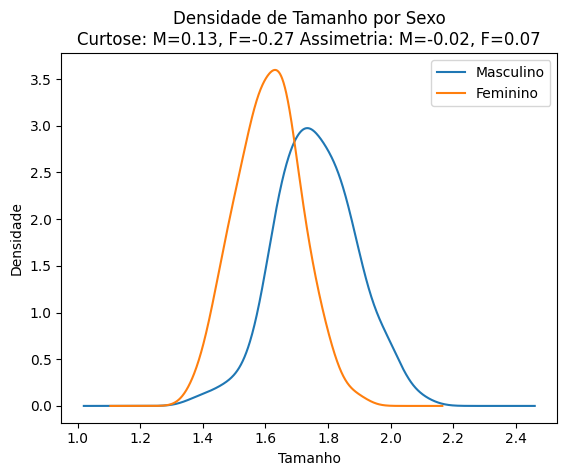

In [145]:
# Crie uma figura e um eixo
fig, ax = plt.subplots()

# Plote a densidade para cada sexo
dados[dados['Sexo'] == 'M']['Tamanho'].plot.density(ax=ax, label='Masculino')
dados[dados['Sexo'] == 'F']['Tamanho'].plot.density(ax=ax, label='Feminino')

# Calcule e inclua as informações de curtose e assimetria no título do gráfico
curtose_masc = kurtosis(dados[dados['Sexo'] == 'M']['Tamanho'])
curtose_fem = kurtosis(dados[dados['Sexo'] == 'F']['Tamanho'])
assimetria_masc = skew(dados[dados['Sexo'] == 'M']['Tamanho'])
assimetria_fem = skew(dados[dados['Sexo'] == 'F']['Tamanho'])

ax.set_title(f'Densidade de Tamanho por Sexo\nCurtose: M={curtose_masc:.2f}, F={curtose_fem:.2f} '
             f'Assimetria: M={assimetria_masc:.2f}, F={assimetria_fem:.2f}')

# Adicione as legendas e rótulos dos eixos
ax.legend()
ax.set_xlabel('Tamanho')
ax.set_ylabel('Densidade')

plt.show()

Aqui conseguimos observar novamente as informações já descritas a cima, como curtose platocúrtica, indicando que as distribuições são mais achatadas que uma distribuição normal. As caudas ficam mais visíveis neste tipo de gráfico.

#### Box Plot com tremulação

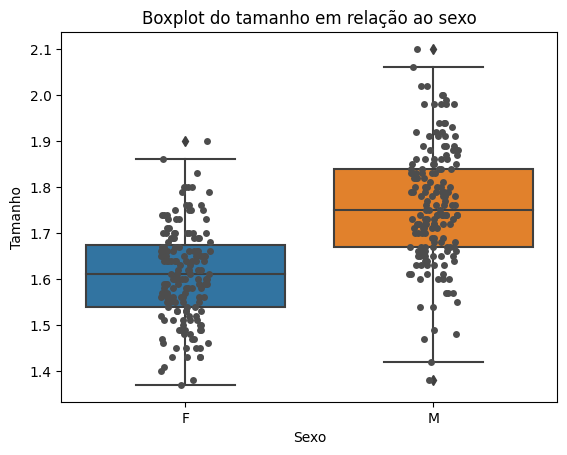

In [146]:
# plotando o gráfico de caixa com tremulação
sns.boxplot(x="Sexo", y="Tamanho", data=dados, dodge=True)
sns.stripplot(x="Sexo", y="Tamanho", data=dados, jitter=True, color=".3")

# adicionando um título e rótulos para os eixos
plt.title("Boxplot do tamanho em relação ao sexo")
plt.xlabel("Sexo")
plt.ylabel("Tamanho")

# exibindo o gráfico
plt.show()

Notamos novamente que a mediana e a média do sexo masculino é deslocada em relação à feminina, tendo os homens maior altura.
O interessante do Boxplot é que conseguimos observar o comportamento da distribuição e os outliers, não havendo outliers inferiores na distribuição feminina, ou seja, não existem mulheres muito mais baixas que a média da amostra. Porém existem duas mulheres muito mais altas que a média. A amostragem aleatoria gerou quartis homogêneos e medianas bem centralizadas.

In [147]:
# Código para as 5 mulheres mais baixas
df_filtro = dados[(dados['Sexo'] == "F")]
df_filtro.nsmallest(5, "Tamanho")

,Sexo,Tamanho
25,F,1.37
45,F,1.38
136,F,1.40
32,F,1.41
18,F,1.43


In [148]:
# Código para as 5 mulheres mais altas
df_filtro = dados[(dados['Sexo'] == "F")]
df_filtro.nlargest(5, "Tamanho")

,Sexo,Tamanho
130,F,1.90
2,F,1.86
133,F,1.83
21,F,1.80
67,F,1.80


Podemos notar que nesse aspecto nossa amostragem não representa tão bem o mundo real.
Agora quanto ao sexo masculino, dois outliers bem discrepantes.

In [149]:
# Calculando a média e outliers inferiores do sexo masculino
df_filtro = dados[(dados['Sexo'] == "M")]

media_tamanho_M = round(df_filtro['Tamanho'].mean(),2)
outliers_inf_M = df_filtro.nsmallest(5, "Tamanho")

print(f"Média de tamanho M: {media_tamanho_M}\nOutliers inferiores:\n {outliers_inf_M}")



Média de tamanho M: 1.76
Outliers inferiores:
     Sexo  Tamanho
315    M     1.38
319    M     1.42
226    M     1.47
306    M     1.48
271    M     1.49


Observamos também que no BoxPlot não existem outliers superiores, ou seja, não existem homens com alturas discrepantes acima da média:

In [150]:
homens_maiores = df_filtro.nlargest(5, "Tamanho")

print(f"Média de tamanho M: {media_tamanho_M}\nHomens Maiores:\n {homens_maiores}")

Média de tamanho M: 1.76
Homens Maiores:
     Sexo  Tamanho
164    M     2.10
207    M     2.06
238    M     2.02
239    M     2.02
173    M     2.00


### Gráfico de Violino

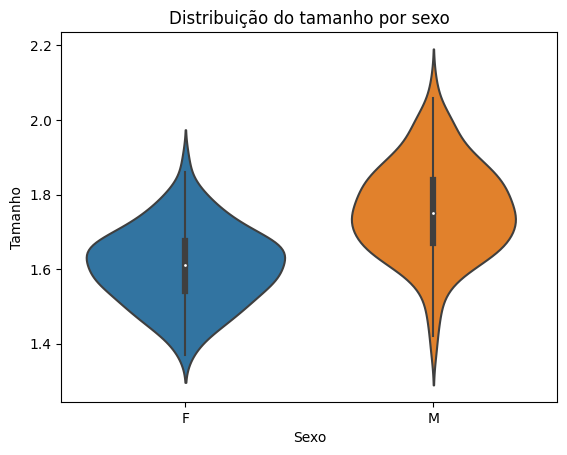

In [151]:
# Criação do gráfico
sns.violinplot(x="Sexo", y="Tamanho", data=dados)

# Personalização do gráfico
plt.title('Distribuição do tamanho por sexo')
plt.xlabel('Sexo')
plt.ylabel('Tamanho')
plt.show()

Podemos observar que a média de altura masculina é maior do que a média feminina, com a média feminina em torno de 1,62m e a masculina em torno de 1,75m, como definido inicialmente. Também é possível observar a desidade dos dados e os limites inferior e superior dos dados de altura para cada gênero.

#### Conclusão
Utilizei gráficos de `histograma, densidade, boxplot e violino` que foram uteis para analisar a natureza da relação entre duas variáveis (quantitativa x qualitativa), este metodologia pode ser usada sempre eu precisar análisar este tipo de relação, Obrigado pela atenção!